In [2]:
# aim, learning about overfitting and underfitting
# choosing the right metric to monitor
# cross-validating our results
# selecting the best features for machine-learing
# optimizing hyperparameters.

In [3]:
# the mean-square error relates with the linear regression model
# you optimize the linear regression model using the mean squareed error.

from sklearn.datasets import load_boston
boston = load_boston()
x,y = boston.data, boston.target
print(x.shape, y.shape)

(506, 13) (506,)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regression = LinearRegression()
regression.fit(x,y)
print ("Mean squared error: %.2f" % mean_squared_error(y_true = y, y_pred = regression.predict(x)))

Mean squared error: 21.90


In [5]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 5)
print (x_train.shape, x_test.shape)

(354, 13) (152, 13)


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
regression.fit(x_train, y_train)
print ("train mean squared error: %.2f" % mean_squared_error(y_true = y_train, y_pred = regression.predict(x_train)))

train mean squared error: 19.07


In [7]:
print ("Test mean squared error: %.2f" % mean_squared_error(y_true = y_test,
                                                           y_pred = regression.predict(x_test)))

Test mean squared error: 30.70


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 8)
regression.fit(x_train, y_train)

print ("train mean squared error: %.2f" % mean_squared_error(y_true = y_train,
                                                            y_pred = regression.predict(x_train)))
print ("test mean squared error: %.2f" % mean_squared_error(y_true = y_test, 
                                                           y_pred = regression.predict(x_test)))

train mean squared error: 21.45
test mean squared error: 23.72


In [9]:
from sklearn.metrics import accuracy_score

In [10]:
import sklearn as sk 
from sklearn.metrics import precision_score

In [11]:
from sklearn.cross_validation import cross_val_score

In [12]:
# using cross_validation on k folds
from sklearn.cross_validation import KFold
import numpy as np

crossvalidation = KFold(n = x.shape[0], n_folds = 10, shuffle = True, random_state=1)
scores = cross_val_score(regression, x,y, scoring = 'mean_squared_error', cv = crossvalidation, n_jobs = 1)

print ('Folds: %i, mean squared error: %.2f std: %.2f' %(len(scores), np.mean(np.abs(scores)), np.std(scores)))

Folds: 10, mean squared error: 23.76 std: 12.13


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-package

In [13]:
import warnings

In [14]:
help (warnings.filterwarnings)

Help on function filterwarnings in module warnings:

filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)
    Insert an entry into the list of warnings filters (at the front).
    
    'action' -- one of "error", "ignore", "always", "default", "module",
                or "once"
    'message' -- a regex that the warning message must match
    'category' -- a class that the warning must be a subclass of
    'module' -- a regex that the module name must match
    'lineno' -- an integer line number, 0 matches all warnings
    'append' -- if true, append to the list of filters



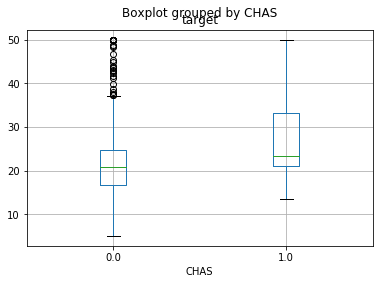

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df =  pd.DataFrame(x,columns = boston.feature_names)
df['target'] = y
boxplot = df.boxplot('target', by = 'CHAS', return_type = 'axes')
plt.show()

In [26]:
from sklearn.cross_validation import StratifiedKFold
stratification = StratifiedKFold(y =x[:,3], n_folds = 10, shuffle = True, random_state = 1)
scores = cross_val_score(regression,x,y, scoring = 'mean_squared_error', cv = stratification,
                        n_jobs = 1)

print ("stratified %i folds cross validation mean squared error: %.2f std: %.2f" %(len(scores),
                                                                                       np.mean(np.abs(scores)),
                                                                                       np.std(scores)))

stratified 10 folds cross validation mean squared error: 23.70 std: 6.10


C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-package

In [27]:
# selecting by univariate measures. Selecting a variable by its
# level of association with its target.using f_regression: used only
# for numeric targets and based on linear regression performance.
#f_classif: used only for categorical targets and based on ANOVA.
# chi2: performs the chi-square statistic for categorical targets, which
# is less sensible to the nonlinear relationship between the predictive
# variable and its target

In [28]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
Selector_f = SelectPercentile(f_regression, percentile = 25)
Selector_f.fit(x,y)
for n,s in zip(boston.feature_names, Selector_f.scores_):
    print ("F-score: %3.2f\t for feature %s" % (s,n))

F-score: 88.15	 for feature CRIM
F-score: 75.26	 for feature ZN
F-score: 153.95	 for feature INDUS
F-score: 15.97	 for feature CHAS
F-score: 112.59	 for feature NOX
F-score: 471.85	 for feature RM
F-score: 83.48	 for feature AGE
F-score: 33.58	 for feature DIS
F-score: 85.91	 for feature RAD
F-score: 141.76	 for feature TAX
F-score: 175.11	 for feature PTRATIO
F-score: 63.05	 for feature B
F-score: 601.62	 for feature LSTAT


In [29]:
# using the level of assciation output helps to choose the most
# important variables for machine-learning model.

In [30]:
# using a greedy search

from sklearn.feature_selection import RFECV
selector = RFECV(estimator = regression, cv = 10, scoring = 'mean_squared_error')
selector.fit(x,y)
print ("optimal number of features: %d" % selector.n_features_)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-package

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-package

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ACER\Anaconda3\lib\site-package

optimal number of features: 6


In [31]:
# it is possible to obtain an index to the optimum variable set
# by calling the attibute support_ from the RFECV class after you fit
# it.

print (boston.feature_names[selector.support_])

['CHAS' 'NOX' 'RM' 'DIS' 'PTRATIO' 'LSTAT']


In [32]:
# the RFECV method can detect whether a variable is important,
# no matter whether it is binary, categorical, or numeric, because
# it directly evaluates the role played by the feature in the prediction.

# The RFECV is certainly more efficient when compared to the univariate
# approach, because it considers highly correlated features and is tuned
# to optimize the evaluation measure.

# As RFECV learns the vest set of variables from data, the selection may
# overfit, which is what happens with all other machine learning algorithms.
# trying, RFECV on different samples of the training data can confirm the 
# best variabls to use.



In [33]:
# pumping up your hyper parameter
# Hyperparameters are paramete that you have to decide by yourself.
# since an algorithm can't learn them automatically from data.
# you have to make your choice carefully after evaluating the cross-validated
# result.

# the scikit-learn sklearn.grid_search module specializes in hyperparameter
# optimization. It contains a few utilities for automating and simplifying the 
# process of searching for the best value of hyperparameters.

import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
x, y = iris.data, iris.target
print (x.shape, y.shape)

(150, 4) (150,)


In [36]:
# demonstrating how to implement a grid search effectively.

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', 
                                 metric = 'minkowski', p = 2)

In [38]:
grid = {'n_neighbors': range(1,11), 'weights': ['uniform','distance'],'p':[1,2]}
print ("Number of tested models: %i" % np.prod([len(grid[element])for element in grid]))
score_metric = 'accuracy'

Number of tested models: 40


In [39]:
from sklearn.cross_validation import cross_val_score
print ("baseline with default parameters: %.3f" % np.mean(cross_val_score(classifier,
                                                                         x,y, cv =10,
                                                                         scoring = score_metric,
                                                                         n_jobs = 1)))

baseline with default parameters: 0.967


In [45]:
from sklearn.grid_search import GridSearchCV
search = GridSearchCV(estimator = classifier, param_grid = grid, scoring = score_metric,n_jobs = 1,refit = True, cv = 10)

search.fit(x,y)

ValueError: Parameter values for parameter (n_neighbors) need to be a sequence.

In [47]:
from sklearn.learning_curve import validation_curve
train_scores, test_scores = validation_curve(KNeighborsClassifier(weights = 'uniform', metric = 'minkowski',p = 1), 
                                            x,y, 'n_neighbors', param_range = range(1,11),cv = 10, scoring = 'accuracy',
                                            n_jobs = 1)

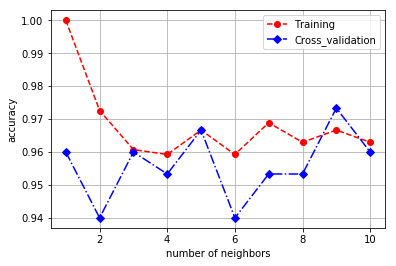

In [48]:
mean_train = np.mean(train_scores, axis = 1)
mean_test = np.mean(test_scores, axis = 1)

plt.plot(range(1,11),mean_train, 'ro--', label = 'Training')
plt.plot(range(1,11), mean_test, 'bD-.',label = 'Cross_validation')

plt.grid()
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.legend(loc = 'upper right', numpoints = 1)
plt.show()

In [51]:
from sklearn.grid_search import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = classifier, param_distributions = grid, n_iter = 10,
                                  scoring = score_metric, n_jobs = 1, refit = True, cv = 10)
random_search.fit(x,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance'], 'p': [1, 2]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [53]:
print ("best parameter :%s" % random_search.best_params_)

best parameter :{'weights': 'uniform', 'p': 1, 'n_neighbors': 9}


In [54]:
print ("CV Accuracy of best paramters: %.3f" % random_search.best_score_)

CV Accuracy of best paramters: 0.973


In [55]:
# the randomized search is straighforward and it is an alternative to
# a much more cpu-expensive grid search.